In [14]:
import numpy as np
import matplotlib.pyplot as plt

from classicalfield_orig import FiniteTempGPE as gpe
from PointTracking_v2 import PointTracker as pt
from itertools import combinations

In [4]:
print(100/g.gpeobj.dt)

327680.0


Total Imag Time:  1.361238718032837
kmax:  4.0212385965949355
T:  0.0
(10001, 128, 128)
(1, 128, 128)


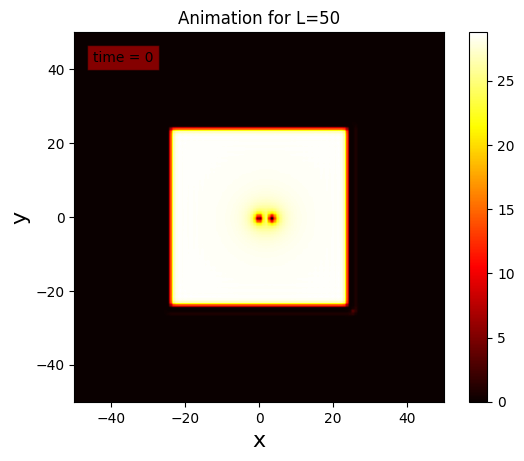

In [8]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 2500000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'abszerovortexlonganim.mp4', Tfact = 0, dst = False, vortex = True)

In [10]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)

In [11]:
v_traj, antiv_traj, circ_array = pt.labelVortices(tracker, getCirc = True) 

In [12]:
v_traj_arr = np.array(v_traj) 
antiv_traj_arr = np.array(antiv_traj) 

In [15]:
# distance 
vortex_combos = np.array(list(combinations(antiv_traj_arr, 2))) # specifically for the antivortex case.... lacking for the vortex/antivortex pair case... 

distance_arr = np.zeros((len(vortex_combos), len(g.snaps)))
angle_arr = np.zeros((len(vortex_combos), len(g.snaps))) 

for i, pair in enumerate(vortex_combos): # for each pair - find the distance 
    for j in range(len(vortex_combos[0][0])): 
    #for j in range(280,290):
 
        
        point1 = pair[0][j] 
        point2 = pair[1][j] 
        xsep = point1[0] - point2[0] 
        ysep = point1[1] - point2[1] 
        dist = np.sqrt(np.abs(point1[0] - point2[0])**2 + np.abs(point1[1] - point2[1])**2) 
        ang = np.arctan(ysep/xsep) 

        distance_arr[i,j] = dist 
        angle_arr[i,j] = ang


C:\Users\TQC User\AppData\Local\Temp\ipykernel_25032\210420921.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  ang = np.arctan(ysep/xsep)


Text(0.5, 1.0, 'Distance between vortices')

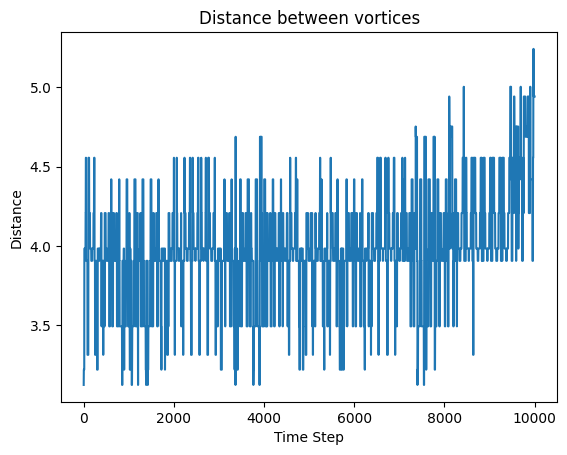

In [16]:
plt.figure() 
 
plt.plot(np.linspace(0,len(distance_arr[0]), len(distance_arr[0])), distance_arr[0])
plt.xlabel('Time Step')
plt.ylabel('Distance') 
plt.title('Distance between vortices')

Text(0.5, 1.0, 'Angle between vortices')

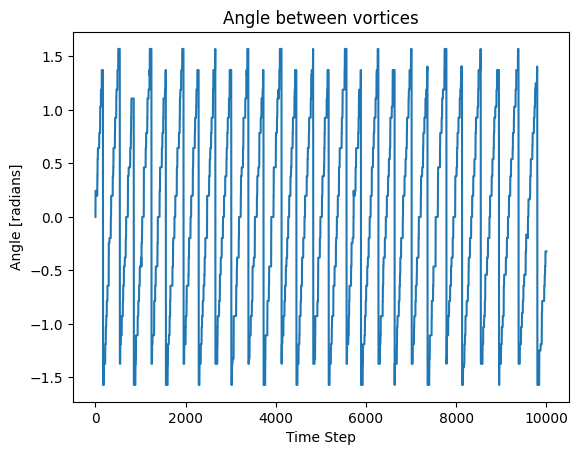

In [17]:
plt.figure() 

plt.plot(np.linspace(0,len(angle_arr[0]), len(angle_arr[0])), angle_arr[0])


plt.xlabel('Time Step')
plt.ylabel('Angle [radians]') 
plt.title('Angle between vortices')